# Scatterplots

In [1]:
import sys
sys.path.append('../../utils')

import utils

In [2]:
import warnings

import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from plotly.offline import plot, iplot, init_notebook_mode

warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

In [3]:
rng1 = np.random.default_rng(1234567890)
rng2 = np.random.default_rng(1234567899)

x = rng1.random(size=(100,1)); y = rng2.random(size=(100,1))

In [4]:
x[:3], y[:3]

(array([[0.70767025],
        [0.12688359],
        [0.59779251]]),
 array([[0.79184604],
        [0.21676064],
        [0.08443692]]))

## Matplotlib

[Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

### A simple scatterplot using `scatter`

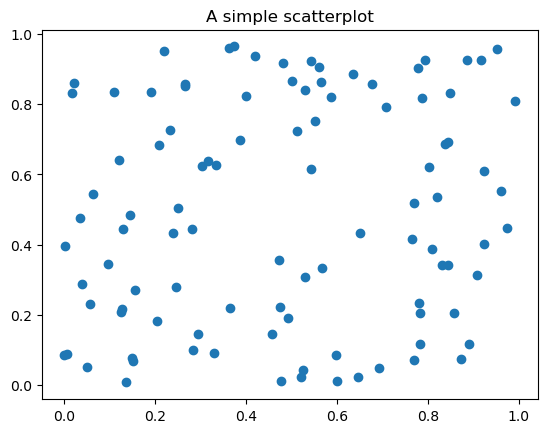

In [5]:
plt.scatter(x, y)
plt.title('A simple scatterplot')

# Saving the image
utils.save_mpl(1)

plt.show()

### Scatterplot with options (color, size, alpha)

[Link](https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py)

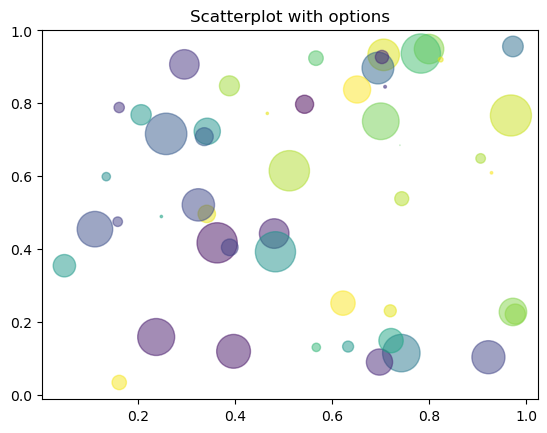

In [6]:
# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatterplot with options')

# Saving the image
utils.save_mpl(2)

plt.show()

### Scatter plot symbols

[Link](https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_symbol.html#sphx-glr-gallery-lines-bars-and-markers-scatter-symbol-py)

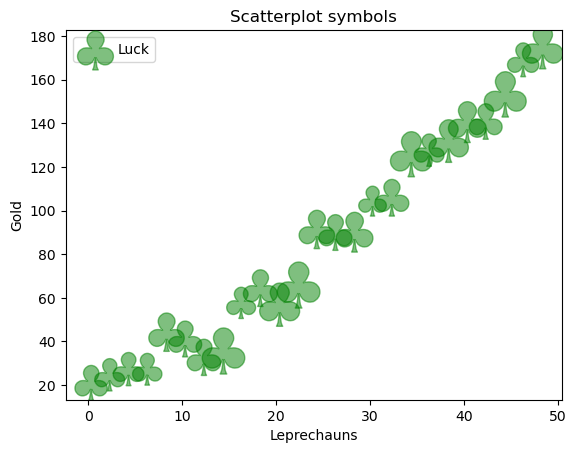

In [7]:
# Fixing random state for reproducibility
np.random.seed(19680801)


x = np.arange(0.0, 50.0, 2.0)
y = x ** 1.3 + np.random.rand(*x.shape) * 30.0
s = np.random.rand(*x.shape) * 800 + 500

plt.scatter(x, y, s, c="g", alpha=0.5, marker=r'$\clubsuit$',
            label="Luck")
plt.xlabel("Leprechauns")
plt.ylabel("Gold")
plt.legend(loc='upper left')

plt.title('Scatterplot symbols')

# Saving the image
utils.save_mpl(3)

plt.show()

### Different markers in matplotlib

[Link](https://matplotlib.org/stable/api/markers_api.html) to a list of all the markers

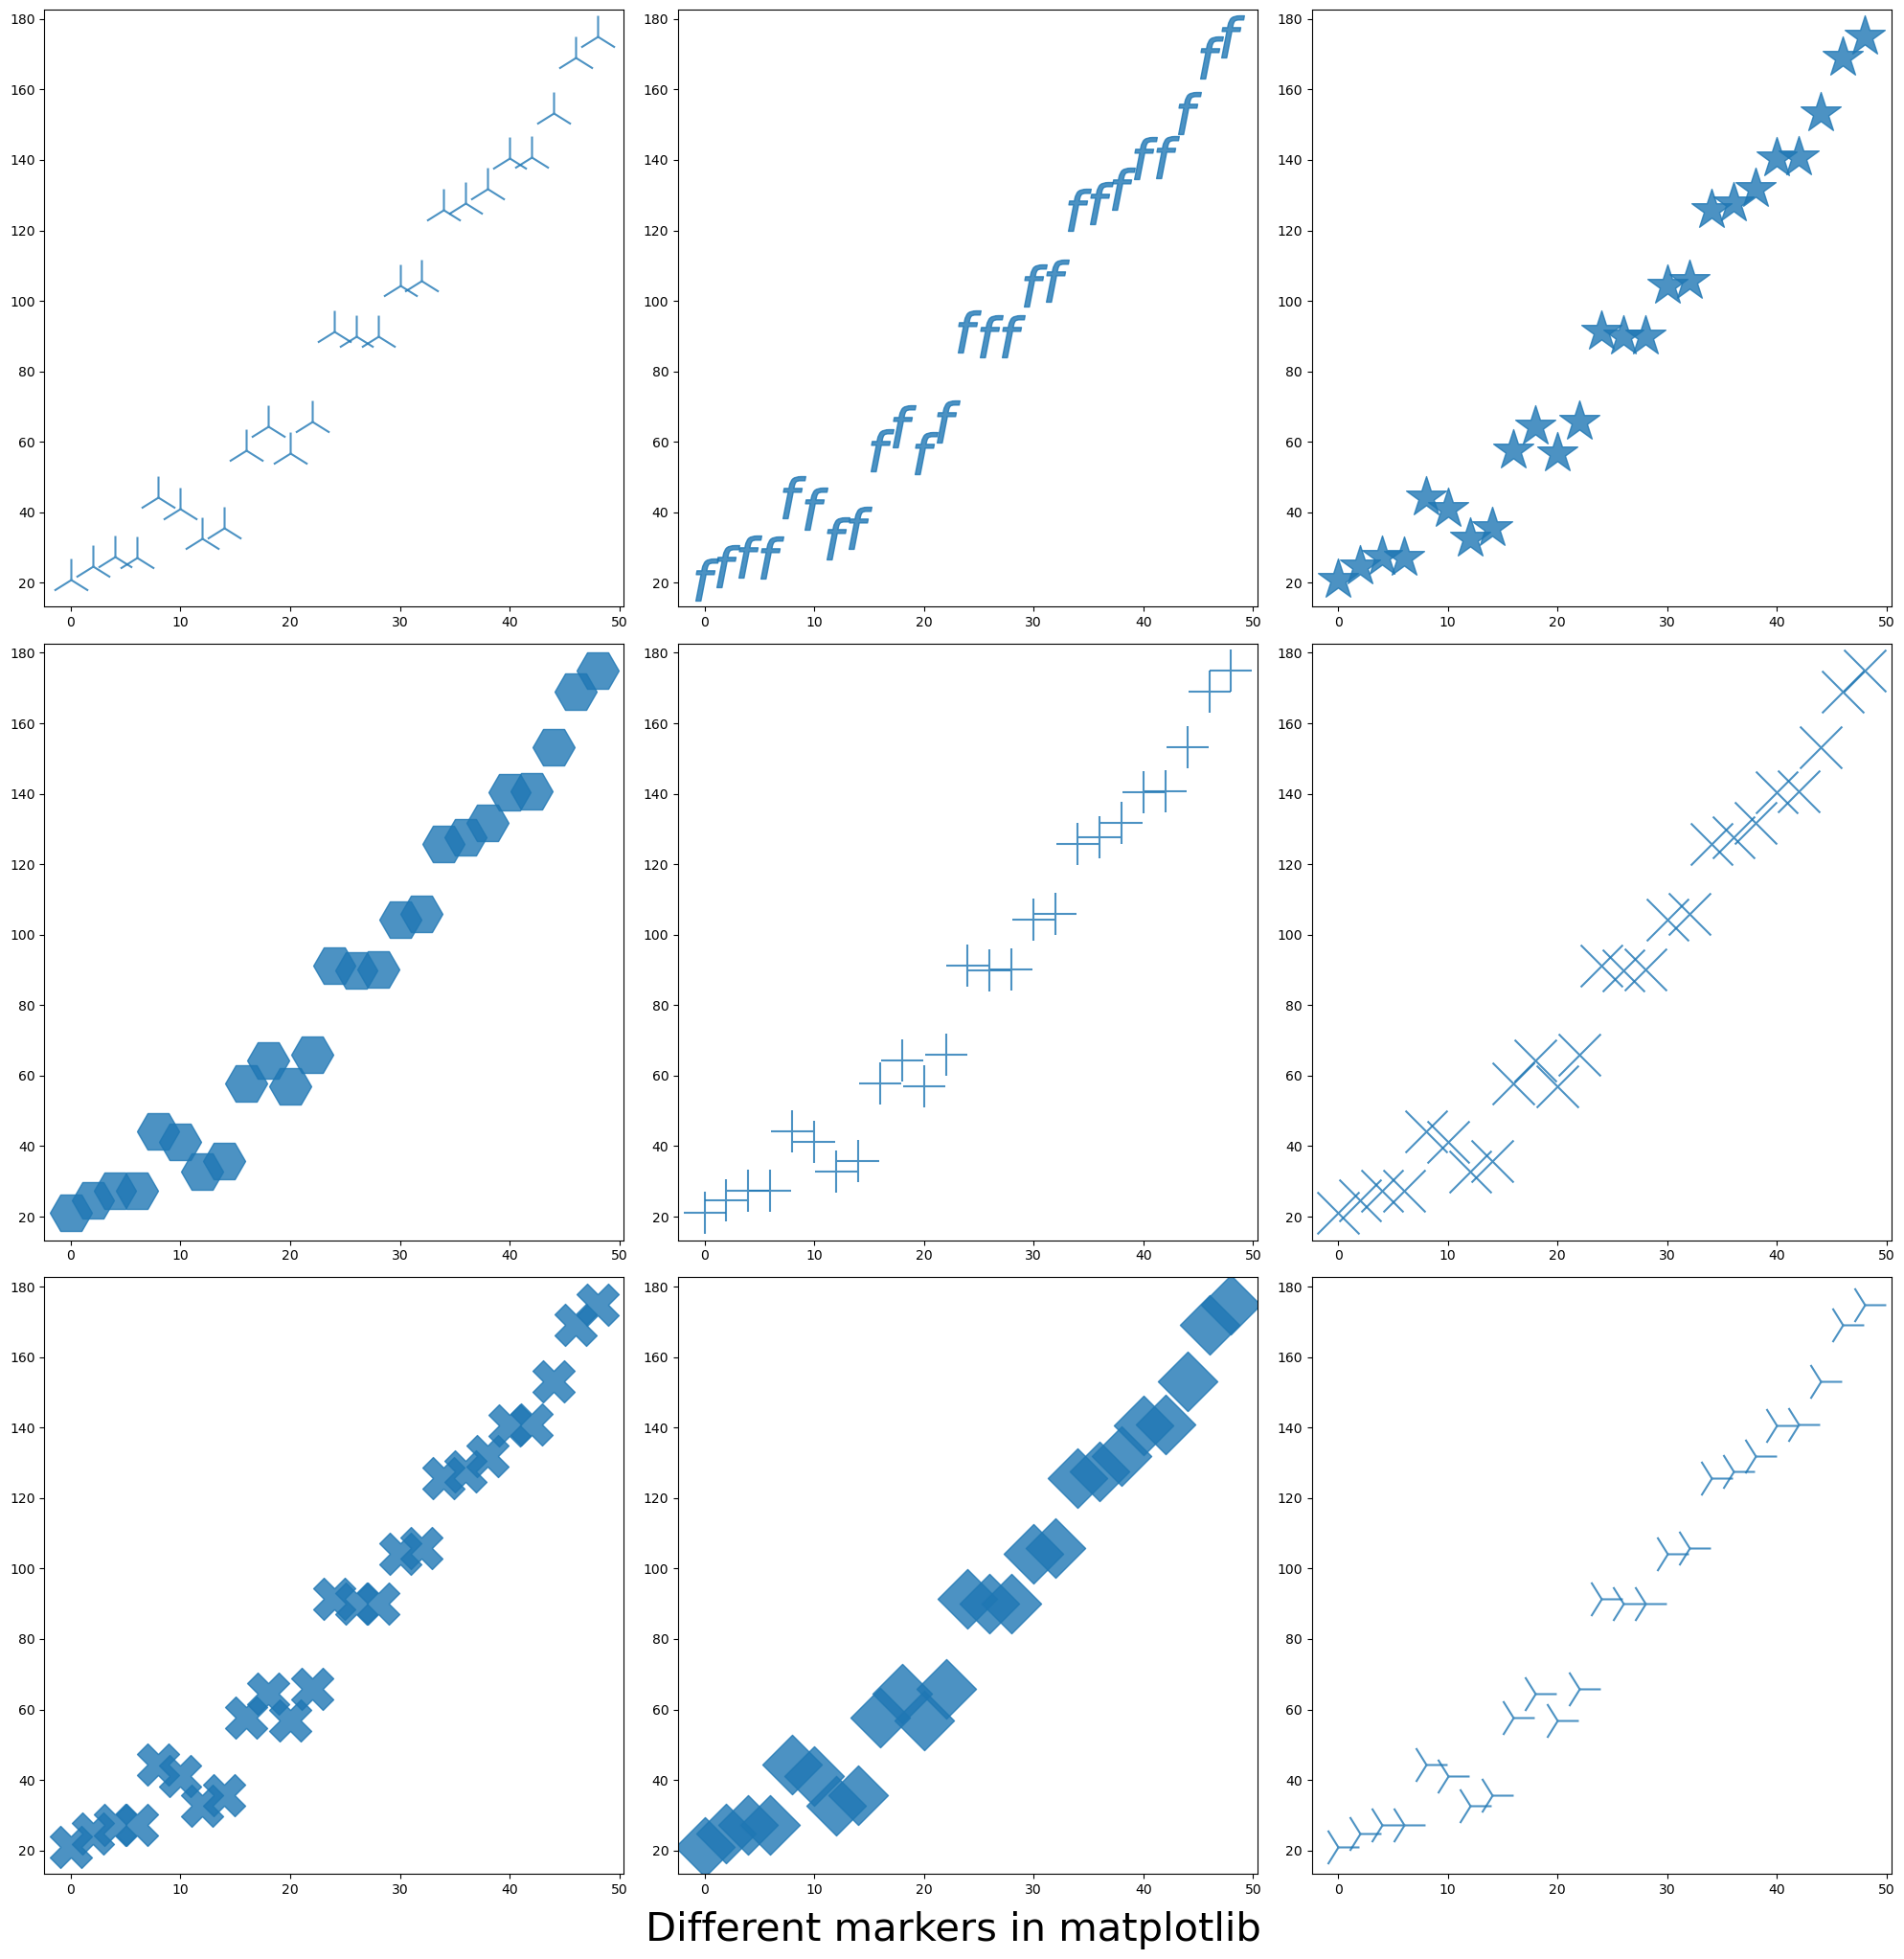

In [8]:
nrows, ncols = 3, 3
fig, ax = plt.subplots(nrows, ncols, figsize=(20, 20))

marker_char = ['2', '$f$', '*', 'H', '+', 'x', 'X', 'D', '4']
idx = 0

for i in range(nrows):
    for j in range(ncols):
        ax[i][j].scatter(x, y, s=1000, alpha=.8, marker=marker_char[idx])
        idx += 1

plt.tight_layout()
plt.suptitle('Different markers in matplotlib', x=.5, y=0, fontsize=30)

# Saving the image
utils.save_mpl(4)

plt.show()

## Seaborn

[Link](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

In [9]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

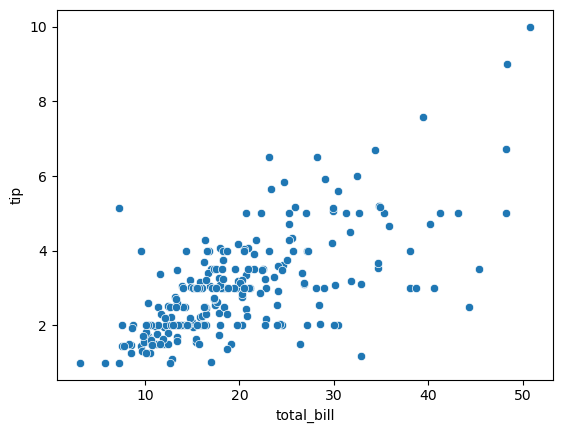

In [10]:
sns.scatterplot(data=tips, x="total_bill", y="tip")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

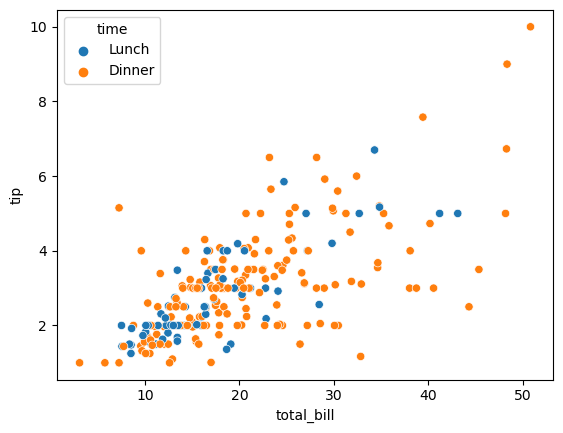

In [11]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

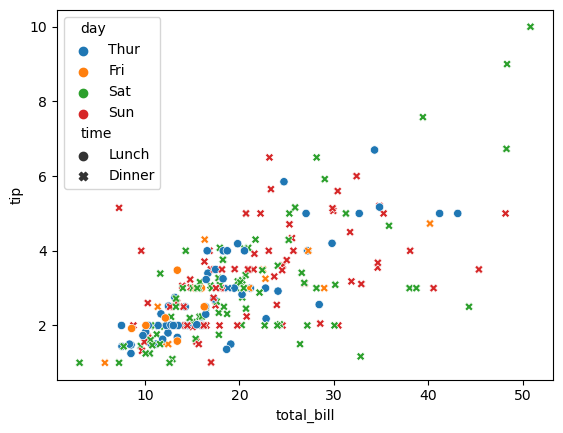

In [12]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day", style="time")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

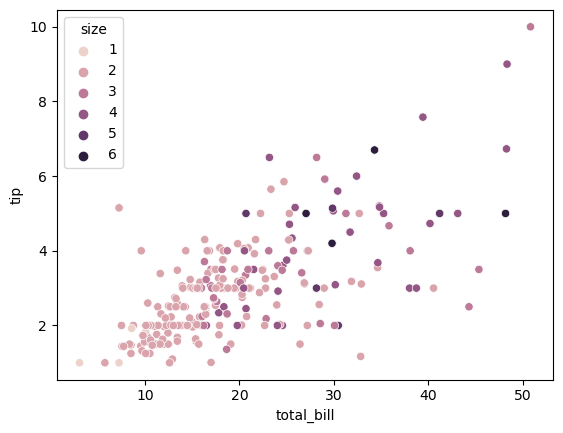

In [13]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

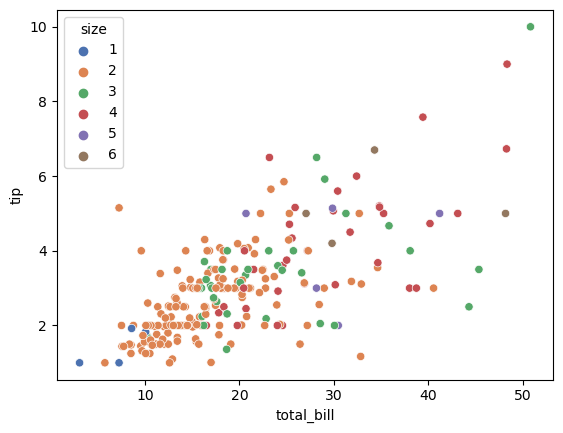

In [14]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size", palette="deep")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

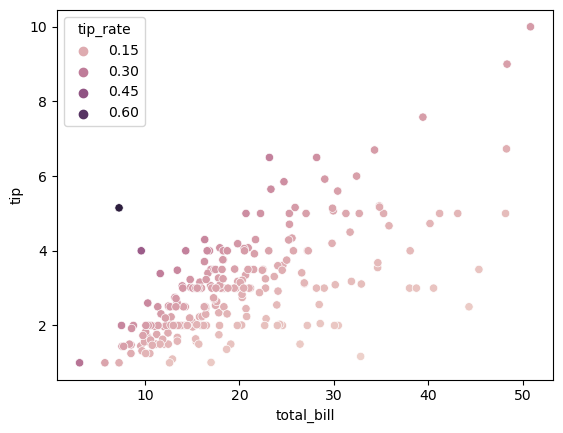

In [15]:
tip_rate = tips.eval("tip / total_bill").rename("tip_rate")
sns.scatterplot(data=tips, x="total_bill", y="tip", hue=tip_rate)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

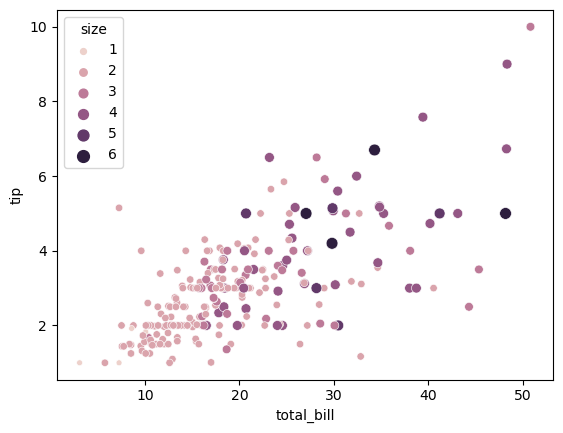

In [16]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size", size="size")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

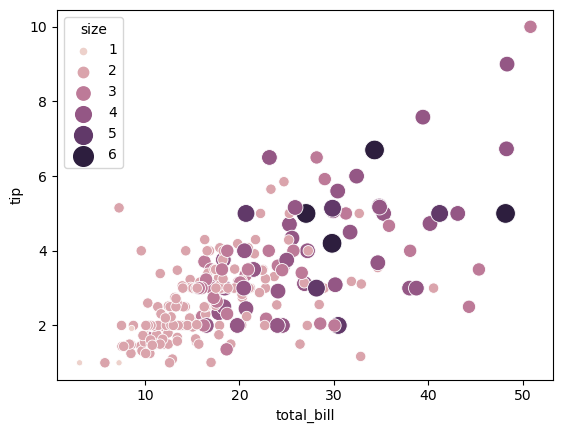

In [17]:
sns.scatterplot(
    data=tips, x="total_bill", y="tip", hue="size", size="size",
    sizes=(20, 200), legend="full"
)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

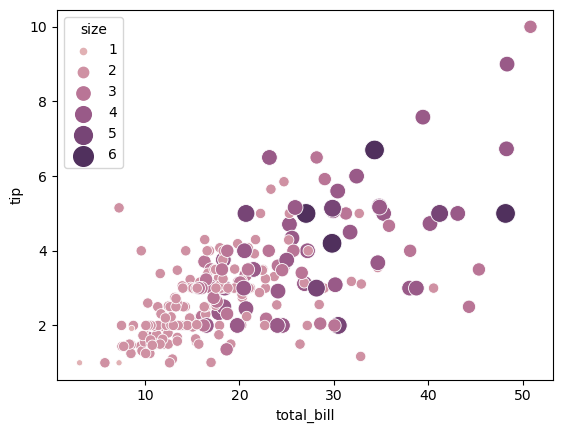

In [18]:
sns.scatterplot(
    data=tips, x="total_bill", y="tip", hue="size", size="size",
    sizes=(20, 200), hue_norm=(0, 7), legend="full"
)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

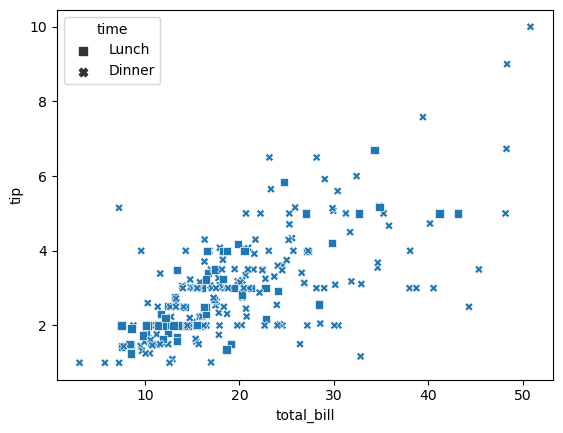

In [19]:
markers = {"Lunch": "s", "Dinner": "X"}
sns.scatterplot(data=tips, x="total_bill", y="tip", style="time", markers=markers)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

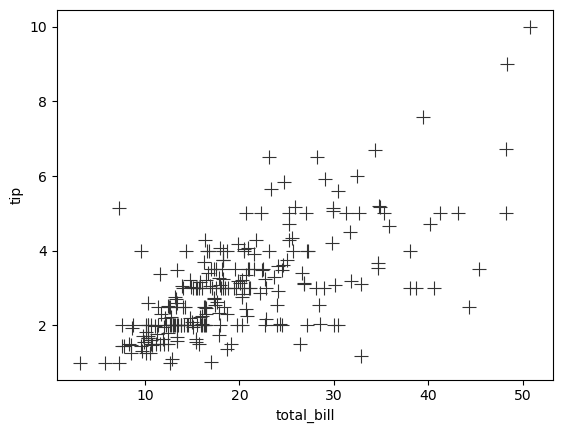

In [20]:
sns.scatterplot(data=tips, x="total_bill", y="tip", s=100, color=".2", marker="+")

<AxesSubplot:xlabel='date'>

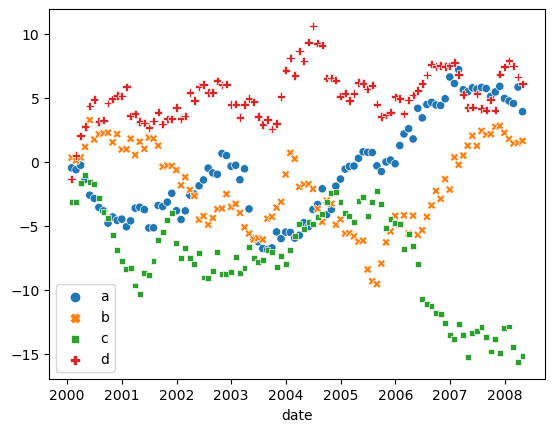

In [21]:
index = pd.date_range("1 1 2000", periods=100, freq="m", name="date")
data = np.random.randn(100, 4).cumsum(axis=0)
wide_df = pd.DataFrame(data, index, ["a", "b", "c", "d"])
sns.scatterplot(data=wide_df)

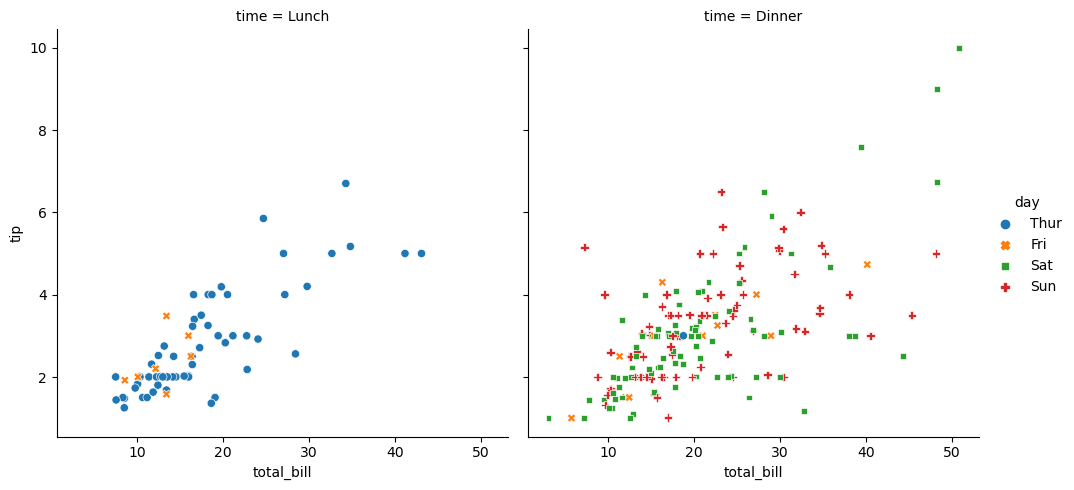

In [22]:
sns.relplot(
    data=tips, x="total_bill", y="tip",
    col="time", hue="day", style="day",
    kind="scatter"
)